In [1]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from metpy.units import units
import numpy as np
from scipy.ndimage import gaussian_filter
import xarray as xr

In [2]:
ds = xr.open_dataset('081416_0600H.f00_Analysis.nc4')
ds

<xarray.Dataset>
Dimensions:                                             (
                                                         height_above_ground_layer: 1,
                                                         bounds_dim: 2,
                                                         latitude: 29,
                                                         isobaric3: 31,
                                                         height_above_ground1: 3,
                                                         time: 1,
                                                         height_above_ground_layer1: 1,
                                                         longitude: 33)
Coordinates:
  * height_above_ground_layer                           (height_above_ground_layer) float64 ...
    reftime                                             datetime64[ns] ...
  * latitude                                            (latitude) float32 20...
  * isobaric3                                           (isobaric3) float64 1...
  * height_above_ground1                                (height_above_ground1) float64 ...
  * time                                                (time) datetime64[ns] ...
  * height_above_ground_layer1                          (height_above_ground_layer1) float64 ...
  * longitude                                           (longitude) float32 1...
Dimensions without coordinates: bounds_dim
Data variables:
    height_above_ground_layer_bounds                    (height_above_ground_layer, bounds_dim) float64 ...
    height_above_ground_layer1_bounds                   (height_above_ground_layer1, bounds_dim) float64 ...
    U-Component_Storm_Motion_height_above_ground_layer  (time, height_above_ground_layer1, latitude, longitude) float32 ...
    u-component_of_wind_isobaric                        (time, isobaric3, latitude, longitude) float32 ...
    Storm_relative_helicity_height_above_ground_layer   (time, height_above_ground_layer, latitude, longitude) float32 ...
    v-component_of_wind_isobaric                        (time, isobaric3, latitude, longitude) float32 ...
    u-component_of_wind_height_above_ground             (time, height_above_ground1, latitude, longitude) float32 ...
    v-component_of_wind_height_above_ground             (time, height_above_ground1, latitude, longitude) float32 ...
    V-Component_Storm_Motion_height_above_ground_layer  (time, height_above_ground_layer1, latitude, longitude) float32 ...
    LatLon_721X1440-0p13S-180p00E                       int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [52]:
lats = ds['latitude']
lons = ds['longitude']

ustorm = ds['U-Component_Storm_Motion_height_above_ground_layer']
vstorm = ds['V-Component_Storm_Motion_height_above_ground_layer']
usurf = ds['u-component_of_wind_height_above_ground']
vsurf = ds['v-component_of_wind_height_above_ground']
uwind = ds['u-component_of_wind_isobaric']
vwind = ds['v-component_of_wind_isobaric']

srh_3k = ds['Storm_relative_helicity_height_above_ground_layer']

# Add 0-3 km Storm-Relative Motion components
ustorm_3k = gaussian_filter(ustorm.sel(height_above_ground_layer1=3000).data[0], sigma=0.5) * units('m/s')
vstorm_3k = gaussian_filter(vstorm.sel(height_above_ground_layer1=3000).data[0], sigma=0.5) * units('m/s')

# Add 0-3 km Storm-Relative Helicity, you can use this one or compute for your own as in the steps below.
SRH_3km_0 = gaussian_filter(srh_3k.sel(height_above_ground_layer=1500).data[0], sigma=0.55) * units('J/kg')

# Compute for the 'user-defined' SRH starting with mean-winds and Storm-Relative Winds (SRW)

# Select u-component winds from surface to 500 hPa
uwnd_surf10 = gaussian_filter(usurf.sel(height_above_ground1=10).data[0], 
                              sigma=1) * units('m/s')
uwnd_1000 = gaussian_filter(uwind.sel(isobaric3=100000).data[0], sigma=1) * units('m/s')
uwnd_950 = gaussian_filter(uwind.sel(isobaric3=95000).data[0], sigma=1) * units('m/s')
uwnd_900 = gaussian_filter(uwind.sel(isobaric3=90000).data[0], sigma=1) * units('m/s')
uwnd_850 = gaussian_filter(uwind.sel(isobaric3=85000).data[0], sigma=1) * units('m/s')
uwnd_800 = gaussian_filter(uwind.sel(isobaric3=80000).data[0], sigma=1) * units('m/s')
uwnd_750 = gaussian_filter(uwind.sel(isobaric3=75000).data[0], sigma=1) * units('m/s')
uwnd_700 = gaussian_filter(uwind.sel(isobaric3=70000).data[0], sigma=1) * units('m/s')
uwnd_650 = gaussian_filter(uwind.sel(isobaric3=65000).data[0], sigma=1) * units('m/s')
uwnd_600 = gaussian_filter(uwind.sel(isobaric3=60000).data[0], sigma=1) * units('m/s')
uwnd_550 = gaussian_filter(uwind.sel(isobaric3=55000).data[0], sigma=1) * units('m/s')
uwnd_500 = gaussian_filter(uwind.sel(isobaric3=50000).data[0], sigma=1) * units('m/s')

# Select v-component winds from surface to 500 hPa.
vwnd_surf10 = gaussian_filter(vsurf.sel(height_above_ground1=10).data[0], 
                              sigma=1) * units('m/s')
vwnd_1000 = gaussian_filter(vwind.sel(isobaric3=100000).data[0], sigma=1) * units('m/s')
vwnd_950 = gaussian_filter(vwind.sel(isobaric3=95000).data[0], sigma=1) * units('m/s')
vwnd_900 = gaussian_filter(vwind.sel(isobaric3=90000).data[0], sigma=1) * units('m/s')
vwnd_850 = gaussian_filter(vwind.sel(isobaric3=85000).data[0], sigma=1) * units('m/s')
vwnd_800 = gaussian_filter(vwind.sel(isobaric3=80000).data[0], sigma=1) * units('m/s')
vwnd_750 = gaussian_filter(vwind.sel(isobaric3=75000).data[0], sigma=1) * units('m/s')
vwnd_700 = gaussian_filter(vwind.sel(isobaric3=70000).data[0], sigma=1) * units('m/s')
vwnd_650 = gaussian_filter(vwind.sel(isobaric3=65000).data[0], sigma=1) * units('m/s')
vwnd_600 = gaussian_filter(vwind.sel(isobaric3=60000).data[0], sigma=1) * units('m/s')
vwnd_550 = gaussian_filter(vwind.sel(isobaric3=55000).data[0], sigma=1) * units('m/s')
vwnd_500 = gaussian_filter(vwind.sel(isobaric3=50000).data[0], sigma=1) * units('m/s')

tot_uwind = uwnd_surf10 + uwnd_1000 + uwnd_950 + uwnd_900 + uwnd_850 + uwnd_800 + uwnd_750 + uwnd_700 + uwnd_650 + uwnd_600 + uwnd_550 + uwnd_500
mean_uwind = tot_uwind / 12 # Number of Ns/Average
mean_uwind = mean_uwind * 75 / 100

tot_vwind = vwnd_surf10 + vwnd_1000 + vwnd_950 + vwnd_900 + vwnd_850 + vwnd_800 + vwnd_750 + vwnd_700 + vwnd_650 + vwnd_600 + vwnd_550 + vwnd_500
mean_vwind = tot_vwind / 12 # Number of Ns/Average
mean_vwind = mean_vwind * 75 / 100

# Calculate U-component Storm-Relative Winds

usrw_sfc = uwnd_surf10 - mean_uwind # 10m SRW
usrw_1000 = uwnd_1000 - mean_uwind #1000 hPa SRW
usrw_950 = uwnd_950 - mean_uwind #950 hPa SRW
usrw_900 = uwnd_900 - mean_uwind #900 hPa SRW
usrw_850 = uwnd_850 - mean_uwind #850 hPa SRW
usrw_800 = uwnd_800 - mean_uwind #800 hPa SRW
usrw_750 = uwnd_750 - mean_uwind #750 hPa SRW
usrw_700 = uwnd_700 - mean_uwind #700 hPa SRW

# Calculate V-component Storm-Relative Winds

vsrw_sfc = vwnd_surf10 - mean_vwind # 10m SRW
vsrw_1000 = vwnd_1000 - mean_vwind #1000 hPa SRW
vsrw_950 = vwnd_950 - mean_vwind #950 hPa SRW
vsrw_900 = vwnd_900 - mean_vwind #900 hPa SRW
vsrw_850 = vwnd_850 - mean_vwind #850 hPa SRW
vsrw_800 = vwnd_800 - mean_vwind #800 hPa SRW
vsrw_750 = vwnd_750 - mean_vwind #750 hPa SRW
vsrw_700 = vwnd_700 - mean_vwind #700 hPa SRW

#Calculate SRH as a dot product and summation of each layers/terms

layer_1 = vsrw_sfc * usrw_1000 - usrw_sfc * vsrw_1000
layer_2 = vsrw_1000 * usrw_950 - usrw_1000 * vsrw_950
layer_3 = vsrw_950 * usrw_900 - usrw_950 * vsrw_900
layer_4 = vsrw_900 * usrw_850 - usrw_900 * vsrw_850
layer_5 = vsrw_850 * usrw_800 - usrw_850 * vsrw_800
layer_6 = vsrw_800 * usrw_750 - usrw_800 * vsrw_750
layer_7 = vsrw_750 * usrw_700 - usrw_750 * vsrw_700

SRH_1km = layer_1 + layer_2 + layer_3

# Uncomment if need to use "user-defined/computed" 0-3 km SRH Parameter. In this case, I used and combined our
# user-defined SRH with the NCEP FNL SRH by averaging both values.

SRH_3km_1 = layer_1 + layer_2 + layer_3 + layer_4 + layer_5 + layer_6 + layer_7

SRH_3km = SRH_3km_0 + SRH_3km_1
SRH_3km = SRH_3km / 2

vtime = datetime.strptime(str(ds.time.data[0].astype('datetime64[ms]')),
                          '%Y-%m-%dT%H:%M:%S.%f')

Computation of SRW (Storm-Relative Winds) is based of Professor Roland Stull's Practical Meteorology Book (Stull, 2017).

Link: https://www.eoas.ubc.ca/books/Practical_Meteorology/

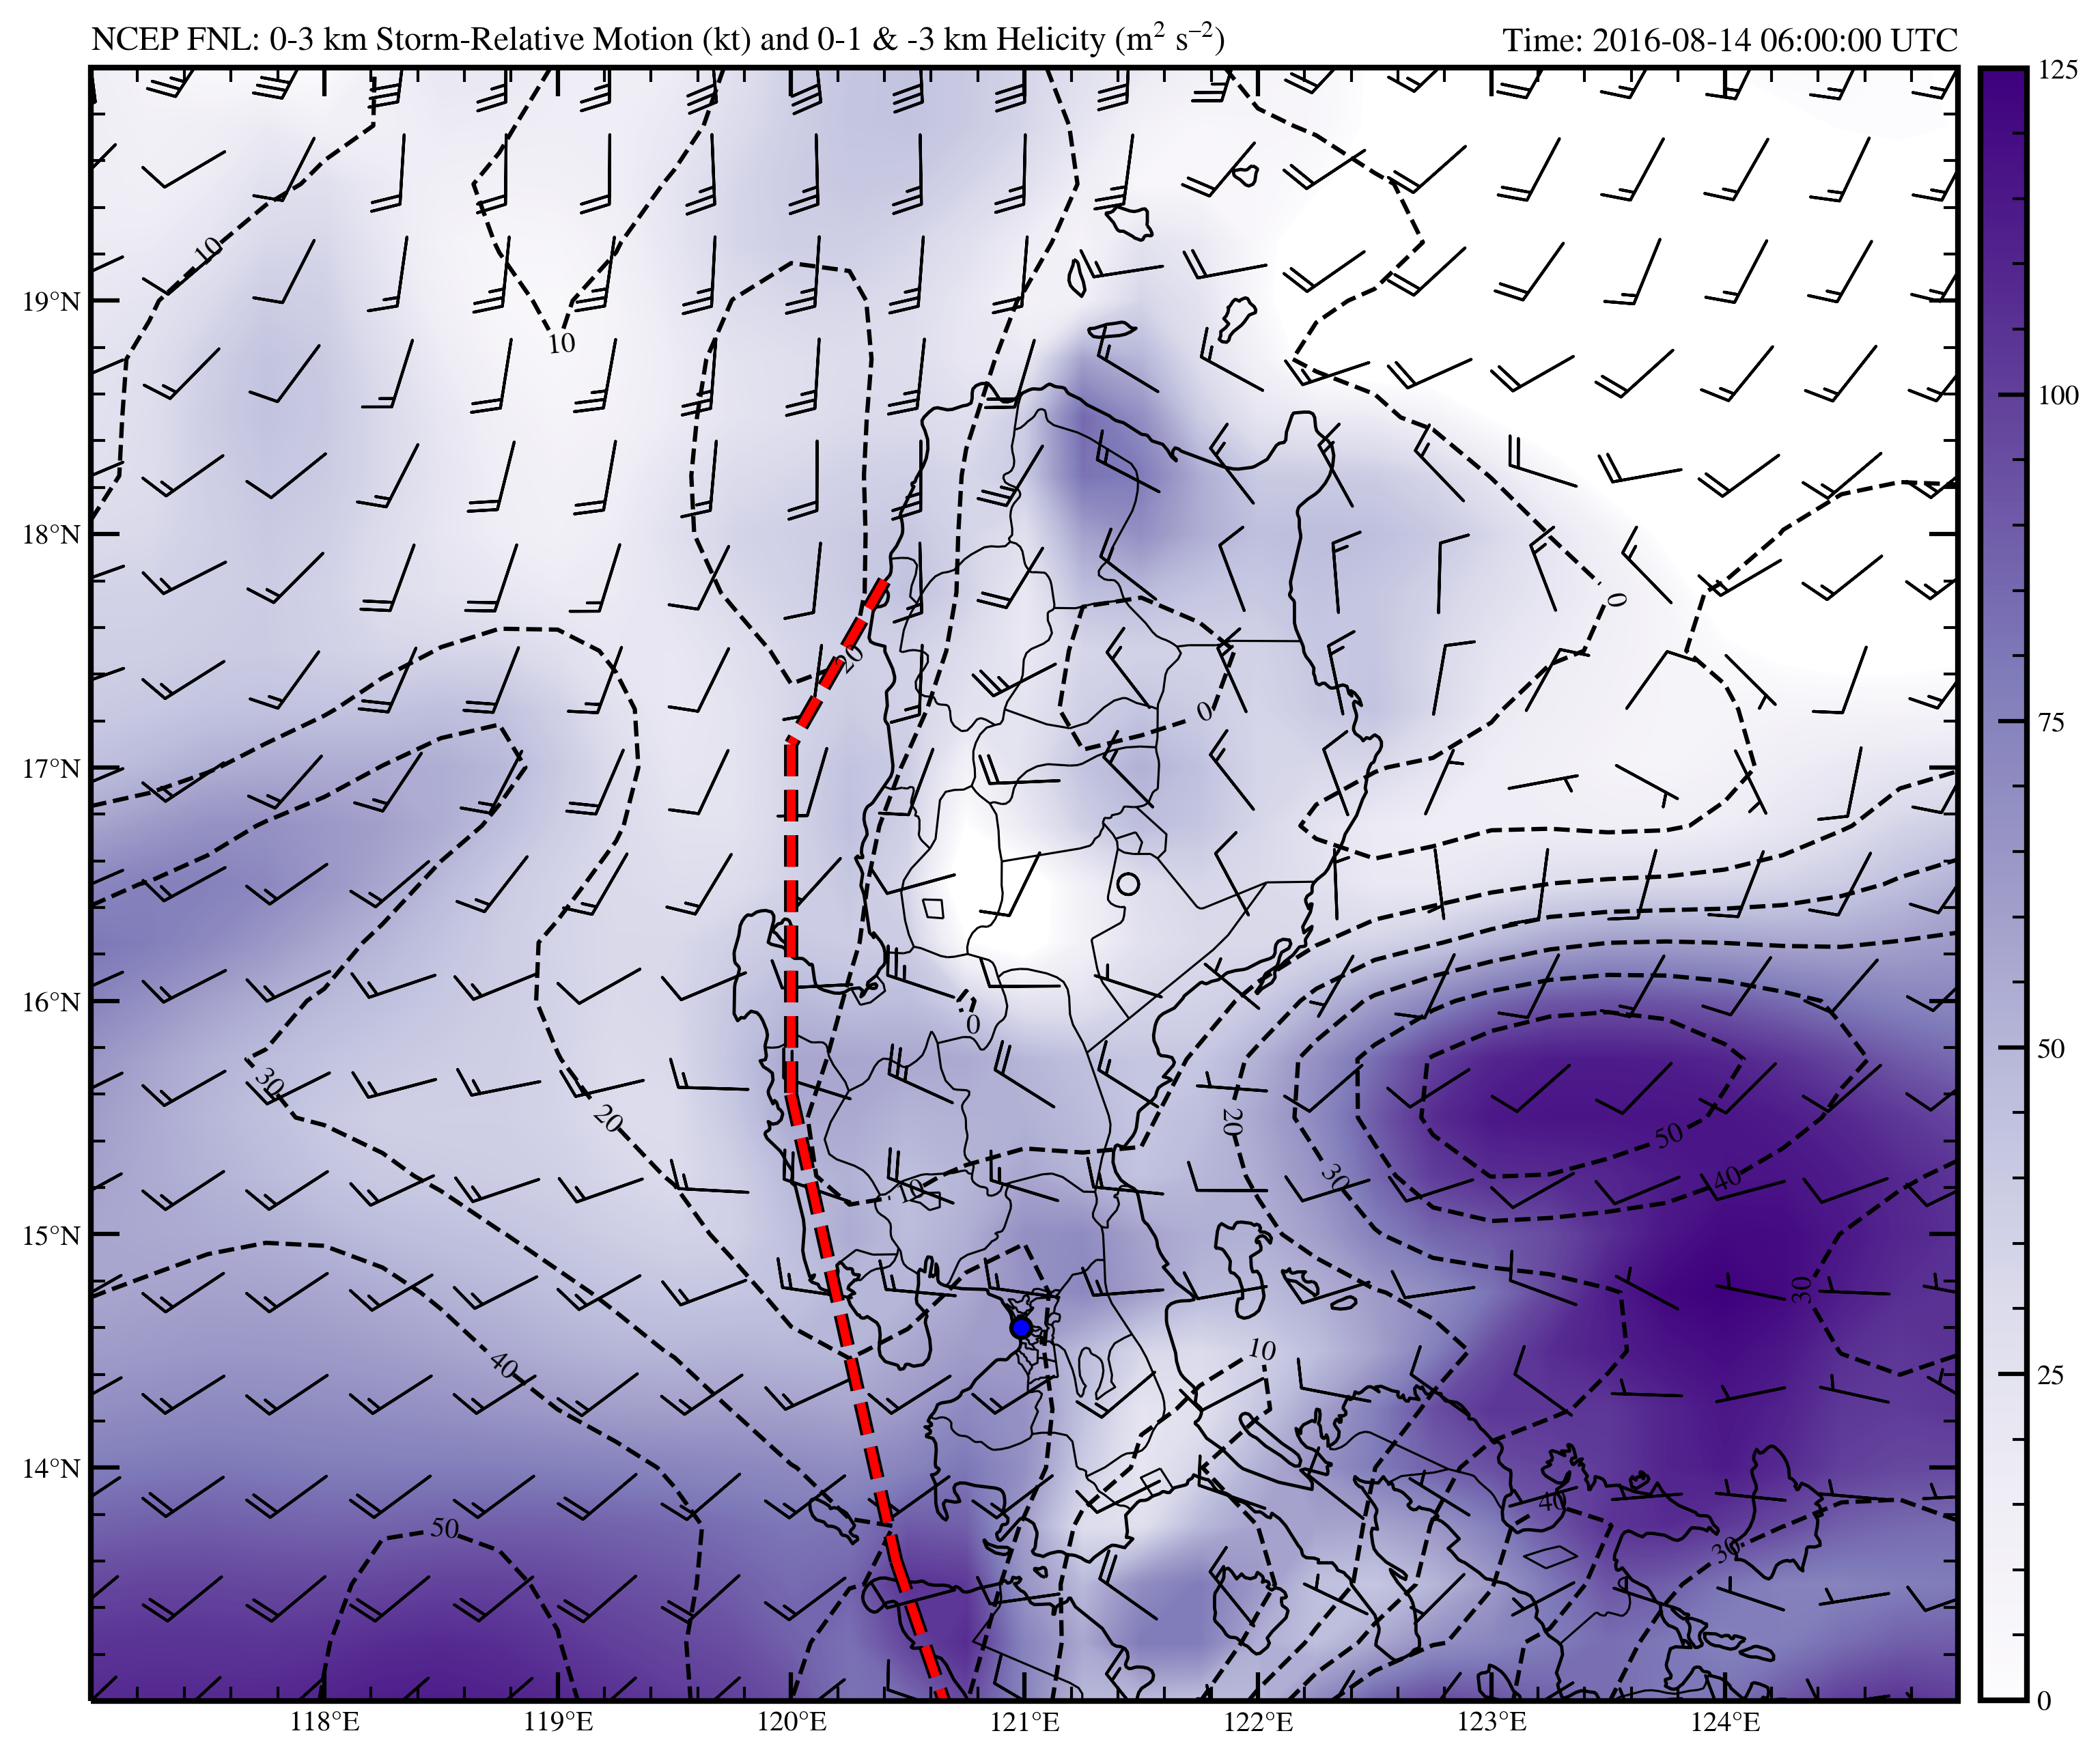

In [54]:
# Set up the projection that will be used for plotting
mapcrs = ccrs.PlateCarree()

# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()

# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=datacrs)
ax.set_extent([117, 125, 13, 20], ccrs.PlateCarree())

# Add geopolitical boundaries for map reference
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', 
                                                scale='10m', facecolor='none', linewidth=0.75)
ax.add_feature(states_provinces, edgecolor='k')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1.15)
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Add SRH_1km contours
sreh1_range = np.arange(0, 70, 10)
sreh1 = ax.contour(lons, lats, SRH_1km, sreh1_range, colors='k', linestyles="--", transform=datacrs)
ax.clabel(sreh1, fmt='%3g')

# Add SRH_3km contours
sreh3_range = np.arange(0, 125.1, 0.1)
sreh3 = ax.contourf(lons, lats, SRH_3km, sreh3_range, cmap='Purples', transform=datacrs)
cbar = plt.colorbar(sreh3, orientation='vertical', pad=0.01, aspect=35, shrink=0.664, 
                    ticks=[0, 25, 50, 75, 100, 125])
cbar.ax.minorticks_on()
cbar.ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
cbar.ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

# Add U and V-components of Storm Motion
ax.barbs(lons, lats, ustorm_3k.to('kt').m, vstorm_3k.to('kt').m, pivot='middle',
         color='black', regrid_shape=17, transform=datacrs)

# Create a/the line(s) that highlights the surface trough
outline=pe.withStroke(linewidth=5, foreground='k')

point1 = dict(lon=120.40, lat=17.80)
point2 = dict(lon=120.00, lat=17.10)
lon_p = [point1['lon'], point2['lon']]
lat_p = [point1['lat'], point2['lat']]
ax.plot(lon_p, lat_p, color='red', lw=3, ls='--', 
        path_effects=[outline, pe.Normal()], transform=ccrs.Geodetic())

point3 = dict(lon=120.00, lat=17.10)
point4 = dict(lon=120.00, lat=15.60)
lon_p1 = [point3['lon'], point4['lon']]
lat_p1 = [point3['lat'], point4['lat']]
ax.plot(lon_p1, lat_p1, color='red', lw=3, ls='--', 
        path_effects=[outline, pe.Normal()], transform=ccrs.Geodetic())

point5 = dict(lon=120.00, lat=15.60)
point6 = dict(lon=120.45, lat=13.60)
lon_p2 = [point5['lon'], point6['lon']]
lat_p2 = [point5['lat'], point6['lat']]
ax.plot(lon_p2, lat_p2, color='red', lw=3, ls='--', 
        path_effects=[outline, pe.Normal()], transform=ccrs.Geodetic())

point7 = dict(lon=120.45, lat=13.60)
point8 = dict(lon=121.10, lat=11.70)
lon_p3 = [point7['lon'], point8['lon']]
lat_p3 = [point7['lat'], point8['lat']]
ax.plot(lon_p3, lat_p3, color='red', lw=3, ls='--', 
        path_effects=[outline, pe.Normal()], transform=ccrs.Geodetic())

# Make some nice titles for the plot (one right, one left)
ax.set_title('NCEP FNL: 0-3 km Storm-Relative Motion (kt) and 0-1 & -3 km Helicity (m$^{2}$ s$^{–2}$) ', loc='left')
ax.set_title('Time: {} UTC'.format(vtime), loc='right')

# Add marker of Manila, NCR via its lats and lons
manila_lon, manila_lat = 120.9842, 14.5995
ax.plot(manila_lon, manila_lat, color='blue', markersize=7, 
        markeredgewidth=1.5, markeredgecolor='k', marker='o', transform=datacrs)

# Set X and Y-ticks for Latitude and Longitude Coordinates
ax.set_yticks(lats, 5, crs=ccrs.PlateCarree())
ax.set_xticks(lons, 5, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
long_formatter = cticker.LongitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.xaxis.set_major_formatter(long_formatter)
ax.set_xticks(ax.get_xticks()[1:8]) #Hide end points of longitude tickmarks
ax.set_yticks(ax.get_yticks()[1:7]) #Hide end points of latitude tickmarks
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

# Adjust image and show
plt.subplots_adjust(bottom=0, top=1)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["mathtext.default"] = 'regular'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.savefig('STM and SRH.jpg', bbox_inches="tight")
plt.show()